<a href="https://colab.research.google.com/github/ghadikhoury/PennAir-ShapeDetection/blob/main/PennAir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip -q install opencv-python numpy matplotlib

OpenCV version: 4.12.0
NumPy version: 2.0.2


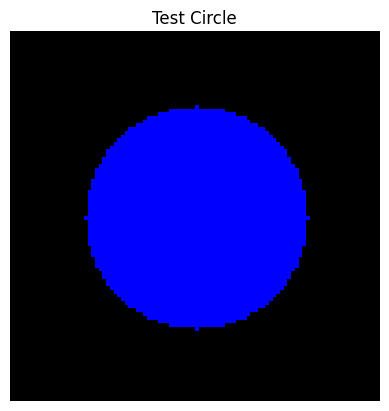

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)

img = np.zeros((100,100,3), dtype=np.uint8)
cv2.circle(img, (50,50), 30, (255,0,0), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Test Circle")
plt.axis("off")
plt.show()


# **Task 1:**

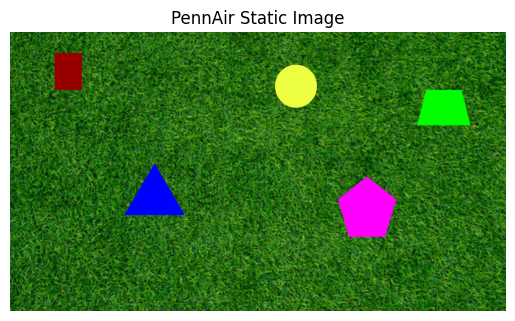

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/PennAir/StaticIMG.png")
assert img is not None, "Check filename or upload failed."

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("PennAir Static Image")
plt.axis("off")
plt.show()

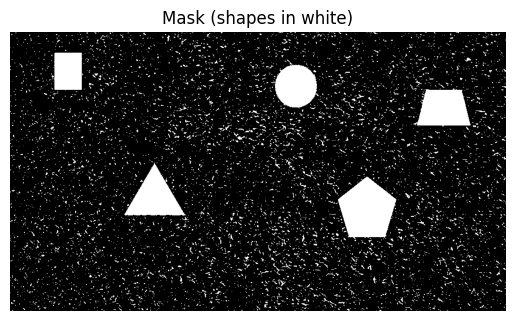

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

non_green = cv2.bitwise_not(cv2.inRange(
    hsv, np.array([35,40,40]), np.array([85,255,255])
))

lime_mask = cv2.inRange(
    hsv, np.array([40, 60, 150]),   # H,S,V lower
         np.array([85, 255, 255])   # H,S,V upper
)

shapes_mask = cv2.bitwise_or(non_green, lime_mask)

plt.imshow(shapes_mask, cmap="gray")
plt.title("Mask (shapes in white)")
plt.axis("off")
plt.show()

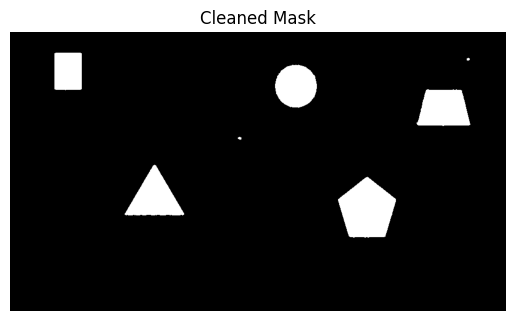

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

clean = cv2.morphologyEx(shapes_mask, cv2.MORPH_OPEN, kernel, iterations=1)
clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(clean, cmap="gray")
plt.title("Cleaned Mask")
plt.axis("off")
plt.show()


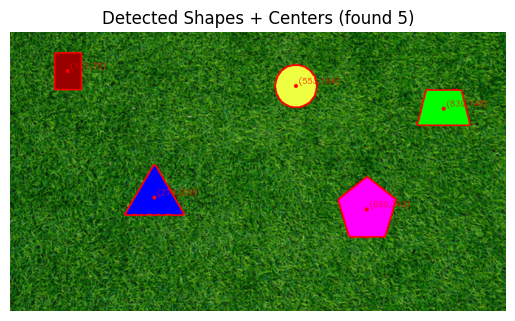

In [8]:
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).copy()
count = 0

for c in contours:
    if cv2.contourArea(c) < 600:
        continue

    count += 1

    cv2.drawContours(out, [c], -1, (255,0,0), 2)


    M = cv2.moments(c)
    if M["m00"] > 0:
        cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
        cv2.circle(out, (cx,cy), 4, (255,0,0), -1)
        cv2.putText(out, f"({cx},{cy})", (cx+5, cy-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.imshow(out)
plt.title(f"Detected Shapes + Centers (found {count})")
plt.axis("off")
plt.show()

In [9]:
import cv2

cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/PennAir/DynamicVID.mp4")
assert cap.isOpened(), "Error: Could not open video."

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot read frame.")
        break

    print("Frame shape:", frame.shape)
    break

cap.release()


Frame shape: (1080, 1920, 3)


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/PennAir/DynamicVID.mp4")
assert cap.isOpened(), "Error: Could not open video."


fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_vid = cv2.VideoWriter("output_shapes.mp4", fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot read frame.")
        break

    # --- Task 1 pipeline starts here ---
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Non-green
    non_green = cv2.bitwise_not(cv2.inRange(
        hsv, np.array([35,40,40]), np.array([85,255,255])
    ))

    # Lime/bright green
    lime_mask = cv2.inRange(
        hsv, np.array([40,60,150]), np.array([85,255,255])
    )


    shapes_mask = cv2.bitwise_or(non_green, lime_mask)


    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    clean = cv2.morphologyEx(shapes_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel, iterations=2)


    contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    out_frame = frame.copy()
    for c in contours:
        if cv2.contourArea(c) < 600:
            continue
        cv2.drawContours(out_frame, [c], -1, (255,0,0), 2)
        M = cv2.moments(c)
        if M["m00"] > 0:
            cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
            cv2.circle(out_frame, (cx, cy), 4, (255,0,0), -1)
            cv2.putText(out_frame, f"({cx},{cy})", (cx+5, cy-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)


    out_vid.write(out_frame)


cap.release()
out_vid.release()
print("Video saved as output_shapes.mp4")



End of video or cannot read frame.
Video saved as output_shapes.mp4


In [11]:
from google.colab import files
files.download("output_shapes.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import cv2
import numpy as np

video_path = "/content/drive/MyDrive/Colab Notebooks/PennAir/DynamicHardVid.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Cannot open video file: {video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
W   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("/content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes.mp4",
                      fourcc, fps, (W, H))

print(W)
print(H)

1920
1080


In [47]:
import cv2
import numpy as np

video_path = "/content/drive/MyDrive/Colab Notebooks/PennAir/PennAir 2024 App Dynamic Hard (1).mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Cannot open video file: {video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
W   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("/content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes.mp4",
                      fourcc, fps, (W, H))

# ---------- Tunables ----------
MIN_AREA   = 700
MAX_AREA   = 0.5 * (W * H)
APPROX_F   = 0.02
OPEN_K     = 5
CLOSE_K    = 17         # strong close to merge gradient splits
SMOOTH_K   = 7
WARMUP_FR  = 60         # frames to learn background
BASE_LR    = 0.005      # learning rate during warmup
RUN_LR     = 0.001      # learning rate after warmup (use 0 for static BG)
USE_SHADOW = False      # if True, remove shadows (value 127) after MOG2

# ---------- MOG2 ----------
# varThreshold ~ 16-25 typical; lower is more sensitive. detectShadows can help but may fragment masks.
mog2 = cv2.createBackgroundSubtractorMOG2(history=600, varThreshold=20, detectShadows=True)

def big_k(k):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k, k))

def classify_quad_by_parallelism(approx):
    pts = approx.reshape(-1, 2).astype(np.float32)
    c = np.mean(pts, axis=0)
    angles = np.arctan2(pts[:,1]-c[1], pts[:,0]-c[0])
    pts = pts[np.argsort(angles)]
    vecs = [pts[(i+1)%4] - pts[i] for i in range(4)]
    angs = [np.arctan2(v[1], v[0]) for v in vecs]
    # parallel check between opposite edges (mod pi)
    p02 = np.abs(((angs[0]-angs[2]+np.pi) % np.pi)) < np.deg2rad(10)
    p13 = np.abs(((angs[1]-angs[3]+np.pi) % np.pi)) < np.deg2rad(10)

    x, y, w, h = cv2.boundingRect(approx)
    ar = w / float(h) if h > 0 else 999

    if p02 and p13:
        # right-angle check
        def angle_between(u, v):
            nu = np.linalg.norm(u); nv = np.linalg.norm(v)
            if nu == 0 or nv == 0: return 0
            cosang = np.clip(np.dot(u, v) / (nu*nv), -1, 1)
            return np.degrees(np.arccos(cosang))
        rightish = []
        for i in range(4):
            ang = angle_between(vecs[i-1], -vecs[i])
            rightish.append(abs(ang-90) < 12)
        if sum(rightish) >= 3:
            if 0.85 < ar < 1.15: return "Square"
            else: return "Rectangle"
        else:
            return "Quadrilateral"
    elif p02 or p13:
        return "Trapezoid"
    else:
        return "Quadrilateral"

def classify_shape(approx):
    v = len(approx)
    if v == 3:  return "Triangle"
    if v == 4:  return classify_quad_by_parallelism(approx)
    if v == 5:  return "Pentagon"
    return "Circle"

frame_idx = 0
while True:
    ok, frame = cap.read()
    if not ok:
        break
    frame_idx += 1

    # Slight denoise to stabilize MOG2 response on textured background
    blur = cv2.GaussianBlur(frame, (5,5), 0)

    # Learning rate schedule
    if frame_idx <= WARMUP_FR:
        lr = BASE_LR
    else:
        lr = RUN_LR

    fg = mog2.apply(blur, learningRate=lr)  # 0..255 mask; 127 are shadows if enabled

    # Remove shadows if requested
    if not USE_SHADOW:
        fg[fg == 127] = 0

    # Hard binarize and clean
    _, fg = cv2.threshold(fg, 200, 255, cv2.THRESH_BINARY)  # keep confident FG
    fg = cv2.morphologyEx(fg, cv2.MORPH_CLOSE, big_k(CLOSE_K))
    fg = cv2.morphologyEx(fg, cv2.MORPH_OPEN, big_k(OPEN_K))
    fg = cv2.medianBlur(fg, SMOOTH_K)

    # Fill holes to prevent inner splits
    fill_src = fg.copy()
    h, w = fill_src.shape
    flood = fill_src.copy()
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(flood, mask, (0,0), 255)
    flood_inv = cv2.bitwise_not(flood)
    filled = cv2.bitwise_or(fill_src, flood_inv)

    contours, hierarchy = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotated = frame.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area < MIN_AREA or area > MAX_AREA:
            continue

        # Approx polygons
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, APPROX_F * peri, True)

        # If too many points due to noisy boundary, simplify more
        if len(approx) > 12:
            approx = cv2.approxPolyDP(c, (APPROX_F * 2.0) * peri, True)

        shape = classify_shape(approx)

        # Draw
        M = cv2.moments(c)
        if M["m00"] > 0:
            cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
            cv2.drawContours(annotated, [c], -1, (0, 0, 255), 2)
            cv2.circle(annotated, (cx, cy), 4, (255, 0, 0), -1)
            cv2.putText(annotated, shape, (cx - 55, cy - 12),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)

    out.write(annotated)

cap.release()
out.release()
print("✅ Saved → /content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes.mp4")



✅ Saved → /content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes.mp4


In [48]:
from google.colab import files

files.download("/content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import cv2
import numpy as np

# video + output
video_path = "/content/drive/MyDrive/Colab Notebooks/PennAir/DynamicHardVidShort.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened(): raise FileNotFoundError(video_path)
fps = cap.get(cv2.CAP_PROP_FPS); W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)); H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("/content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes3D.mp4", fourcc, fps, (W,H))

# ---------- camera intrinsics (given) ----------
K = np.array([[2564.3186869,    0.0,           0.0],
              [   0.0,        2569.70273111,   0.0],
              [   0.0,           0.0,           1.0]])
fx = K[0,0]; fy = K[1,1]; cx = K[0,2]; cy = K[1,2]

# ---------- world circle radius (in inches) ----------
R_world = 10.0   # inches

# ---------- MOG2 params (adapt from your working pipeline) ----------
mog2 = cv2.createBackgroundSubtractorMOG2(history=600, varThreshold=20, detectShadows=True)
WARMUP_FR = 60
BASE_LR = 0.005
RUN_LR  = 0.001

MIN_AREA = 700
MAX_AREA = 0.5 * (W * H)
APPROX_F = 0.02

def classify_shape(approx):
    v = len(approx)
    if v == 3: return "Triangle"
    if v == 4: return "Quadrilateral"
    if v == 5: return "Pentagon"
    return "Circle"

frame_idx = 0
# Optionally keep last known circle Z to assign to other shapes on same plane
last_circle_Z = None

while True:
    ok, frame = cap.read()
    if not ok: break
    frame_idx += 1

    blur = cv2.GaussianBlur(frame, (5,5), 0)
    lr = BASE_LR if frame_idx <= WARMUP_FR else RUN_LR
    fg = mog2.apply(blur, learningRate=lr)

    fg[fg == 127] = 0
    _, fg = cv2.threshold(fg, 200, 255, cv2.THRESH_BINARY)
    fg = cv2.morphologyEx(fg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17)))
    fg = cv2.morphologyEx(fg, cv2.MORPH_OPEN,  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
    fg = cv2.medianBlur(fg, 7)

    # fill holes
    fill = fg.copy()
    h, w = fill.shape
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(fill, mask, (0,0), 255)
    flood_inv = cv2.bitwise_not(fill)
    filled = cv2.bitwise_or(fg, flood_inv)

    contours, hierarchy = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotated = frame.copy()

    # per-frame circle Z candidates (to compute mean if multiple circles)
    circle_Zs = []

    for c in contours:
        area = cv2.contourArea(c)
        if area < MIN_AREA or area > MAX_AREA: continue

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, APPROX_F * peri, True)
        shape = classify_shape(approx)

        M = cv2.moments(c)
        if M["m00"] == 0: continue
        u = (M["m10"]/M["m00"])   # pixel x
        v = (M["m01"]/M["m00"])   # pixel y

        label = shape
        Z_est = None

        if shape == "Circle":
            # robust pixel radius via minEnclosingCircle of contour
            (uc, vc), r_px = cv2.minEnclosingCircle(c)
            r_px = float(r_px)
            if r_px > 1e-3:
                # depth in same units as R_world (inches)
                # Use average focal length (or fx,fy separately if preferred)
                f = 0.5*(fx + fy)
                Z_est = (f * R_world) / r_px    # inches
                circle_Zs.append(Z_est)

                # compute 3D coords
                X = (uc - cx) * Z_est / fx
                Y = (vc - cy) * Z_est / fy
                label = f"Circle Z={Z_est:.2f}in X={X:.2f}in Y={Y:.2f}in"

                # draw radius and center
                cv2.circle(annotated, (int(uc), int(vc)), int(round(r_px)), (0,255,0), 2)
                cv2.circle(annotated, (int(uc), int(vc)), 3, (255,0,0), -1)
            else:
                label = "Circle (too small)"
        else:
            # Non-circle: if a circle Z is known (this frame or last), use it as planar Z
            if len(circle_Zs) > 0:
                Z_planar = float(np.median(circle_Zs))
                last_circle_Z = Z_planar
            elif last_circle_Z is not None:
                Z_planar = last_circle_Z
            else:
                Z_planar = None

            if Z_planar is not None:
                X = (u - cx) * Z_planar / fx
                Y = (v - cy) * Z_planar / fy
                label = f"{shape} Z={Z_planar:.2f}in X={X:.2f}in Y={Y:.2f}in"
            else:
                label = f"{shape} Z=unknown"

            # draw contour center
            cv2.circle(annotated, (int(round(u)), int(round(v))), 4, (255,0,0), -1)

        # draw contour and label
        cv2.drawContours(annotated, [c], -1, (0,0,255), 2)
        cv2.putText(annotated, label, (int(round(u))-60, int(round(v))-12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)

    # update last_circle_Z if we found any circles this frame
    if len(circle_Zs) > 0:
        last_circle_Z = float(np.median(circle_Zs))

    out.write(annotated)

cap.release()
out.release()
print("Saved -> /content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes3D.mp4")


Saved -> /content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes3D.mp4


In [50]:
from google.colab import files

files.download("/content/drive/MyDrive/Colab Notebooks/PennAir/OutputShapes3D.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import cv2
import numpy as np

video_path = "/content/drive/MyDrive/Colab Notebooks/PennAir/DynamicHardVidShort.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened(): raise FileNotFoundError(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("/content/drive/MyDrive/Colab Notebooks/PennAir/TrackedShapes.mp4", fourcc, fps, (W, H))

# ---------- MOG2 ----------
mog2 = cv2.createBackgroundSubtractorMOG2(history=600, varThreshold=20, detectShadows=True)
WARMUP_FR = 60
BASE_LR = 0.005
RUN_LR  = 0.001

# ---------- Tracking ----------
tracked_shapes = {}  # id → {'type', 'center', 'contour', 'last_seen', 'trajectory'}
next_id = 0
MAX_DIST = 60
MAX_MISSED = 10

# ---------- Detection ----------
MIN_AREA = 700
MAX_AREA = 0.5 * (W * H)
APPROX_F = 0.02

def classify_shape(approx):
    v = len(approx)
    if v == 3: return "Triangle"
    if v == 4: return "Quadrilateral"
    if v == 5: return "Pentagon"
    return "Circle"

frame_idx = 0
while True:
    ok, frame = cap.read()
    if not ok: break
    frame_idx += 1

    blur = cv2.GaussianBlur(frame, (5,5), 0)
    lr = BASE_LR if frame_idx <= WARMUP_FR else RUN_LR
    fg = mog2.apply(blur, learningRate=lr)
    fg[fg == 127] = 0
    _, fg = cv2.threshold(fg, 200, 255, cv2.THRESH_BINARY)
    fg = cv2.morphologyEx(fg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17)))
    fg = cv2.morphologyEx(fg, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
    fg = cv2.medianBlur(fg, 7)

    # Fill holes
    fill = fg.copy()
    h, w = fill.shape
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(fill, mask, (0,0), 255)
    flood_inv = cv2.bitwise_not(fill)
    filled = cv2.bitwise_or(fg, flood_inv)

    contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotated = frame.copy()
    updated_ids = set()

    detected_shapes = []
    for c in contours:
        area = cv2.contourArea(c)
        if area < MIN_AREA or area > MAX_AREA: continue

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, APPROX_F * peri, True)
        shape = classify_shape(approx)

        M = cv2.moments(c)
        if M["m00"] == 0: continue
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        detected_shapes.append({'type': shape, 'center': (cx, cy), 'contour': c})

    # Match detected shapes to tracked ones
    for shape in detected_shapes:
        cx, cy = shape['center']
        best_match = None
        best_dist = MAX_DIST

        for tid, info in tracked_shapes.items():
            px, py = info['center']
            dist = np.hypot(cx - px, cy - py)
            if dist < best_dist and shape['type'] == info['type']:
                best_match = tid
                best_dist = dist

        if best_match is not None:
            # Update existing track
            tracked_shapes[best_match]['center'] = (cx, cy)
            tracked_shapes[best_match]['contour'] = shape['contour']
            tracked_shapes[best_match]['last_seen'] = frame_idx
            tracked_shapes[best_match]['trajectory'].append((cx, cy))
            updated_ids.add(best_match)
        else:
            # New shape
            tracked_shapes[next_id] = {
                'type': shape['type'],
                'center': (cx, cy),
                'contour': shape['contour'],
                'last_seen': frame_idx,
                'trajectory': [(cx, cy)]
            }
            updated_ids.add(next_id)
            next_id += 1

    # Remove stale tracks
    tracked_shapes = {
        tid: info for tid, info in tracked_shapes.items()
        if frame_idx - info['last_seen'] <= MAX_MISSED
    }

    # Draw tracked shapes and trajectories
    for tid, info in tracked_shapes.items():
        cx, cy = info['center']
        shape = info['type']
        cv2.drawContours(annotated, [info['contour']], -1, (0, 0, 255), 2)
        cv2.circle(annotated, (cx, cy), 4, (255, 0, 0), -1)
        cv2.putText(annotated, f"ID {tid} {shape}", (cx - 50, cy - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

        # Draw trajectory
        pts = info['trajectory']
        for i in range(1, len(pts)):
            cv2.line(annotated, pts[i-1], pts[i], (0, 255, 0), 2)

    out.write(annotated)

cap.release()
out.release()
print("Saved → /content/drive/MyDrive/Colab Notebooks/PennAir/TrackedShapes.mp4")


✅ Saved → /content/drive/MyDrive/Colab Notebooks/PennAir/TrackedShapes.mp4


In [52]:
from google.colab import files

files.download("/content/drive/MyDrive/Colab Notebooks/PennAir/TrackedShapes.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>